In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

diabetes_df = pd.read_csv("../week_06/diabetes.csv")

diabetes_df.head()


/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_33616/2257154506.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=32)

In [3]:
# decision tree classifier 
# deep and complex trees tend to overfit, so we want to generalize and have
# reasonably simple trees as much as possible
model = tree.DecisionTreeClassifier(max_depth = 7, random_state=32)

In [4]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       147
           1       0.60      0.62      0.61        84

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



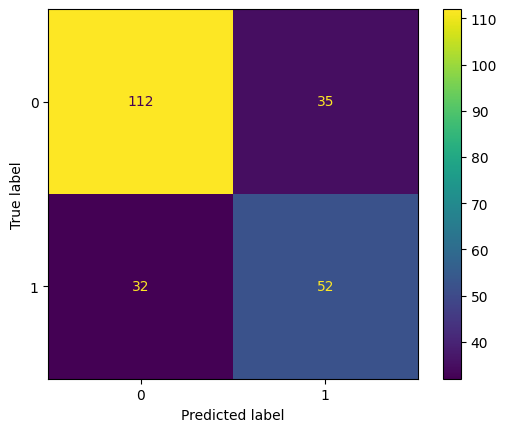

In [6]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)